In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%cd "../.."

/home/hazzu/Code/opencv_streamlit


In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

from services.image_search_engine.superpoint import SuperPointFrontend

DATASET_DIR = "./services/image_search_engine/val2017"
images_name = os.listdir(os.path.join(DATASET_DIR, "images"))

# fe = SuperPointFrontend(
#     "services/image_search_engine/superpoint_v1.pth",
#     nms_dist=4,
#     conf_thresh=0.015,
#     nn_thresh=0.7,
#     cuda=True,
# )
# sift = cv2.SIFT_create()
orb = cv2.ORB_create()

number_of_keypoints = []
for image_name in tqdm(images_name):
    image_path = os.path.join(DATASET_DIR, "images", image_name)
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kp, des = orb.detectAndCompute(gray, None)
    keypoints = [
        [kp.pt[0], kp.pt[1], kp.size, kp.angle, kp.response, kp.octave, kp.class_id]
        for kp in kp
    ]
    number_of_keypoints.append(len(kp))

    image_name_no_ext = os.path.splitext(image_name)[0]
    np.save(
        os.path.join(DATASET_DIR, "keypoints", f"{image_name_no_ext}.npy"), keypoints
    )
    np.save(os.path.join(DATASET_DIR, "descriptors", f"{image_name_no_ext}.npy"), des)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:49<00:00, 100.53it/s]


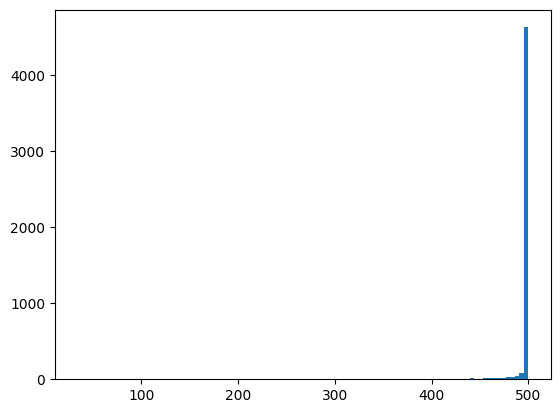

In [5]:
import matplotlib.pyplot as plt

plt.hist(number_of_keypoints, bins=100)
plt.show()